In [17]:
import pandas as pd
 
# The selected 4 Venues are Ylläs, Himos, Serena and Ruka
train_venues = [
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Yllas_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Himos_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Serena_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Ruka_final.csv"
]
train_dfs = [pd.read_csv(f) for f in train_venues]
df_train = pd.concat(train_dfs, ignore_index=True)
 
# The selected Venue for testing is Tahko
test_venue = "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Tahko_final.csv"
df_test = pd.read_csv(test_venue)
 
df_train.shape, df_test.shape

((29587, 8), (7305, 8))

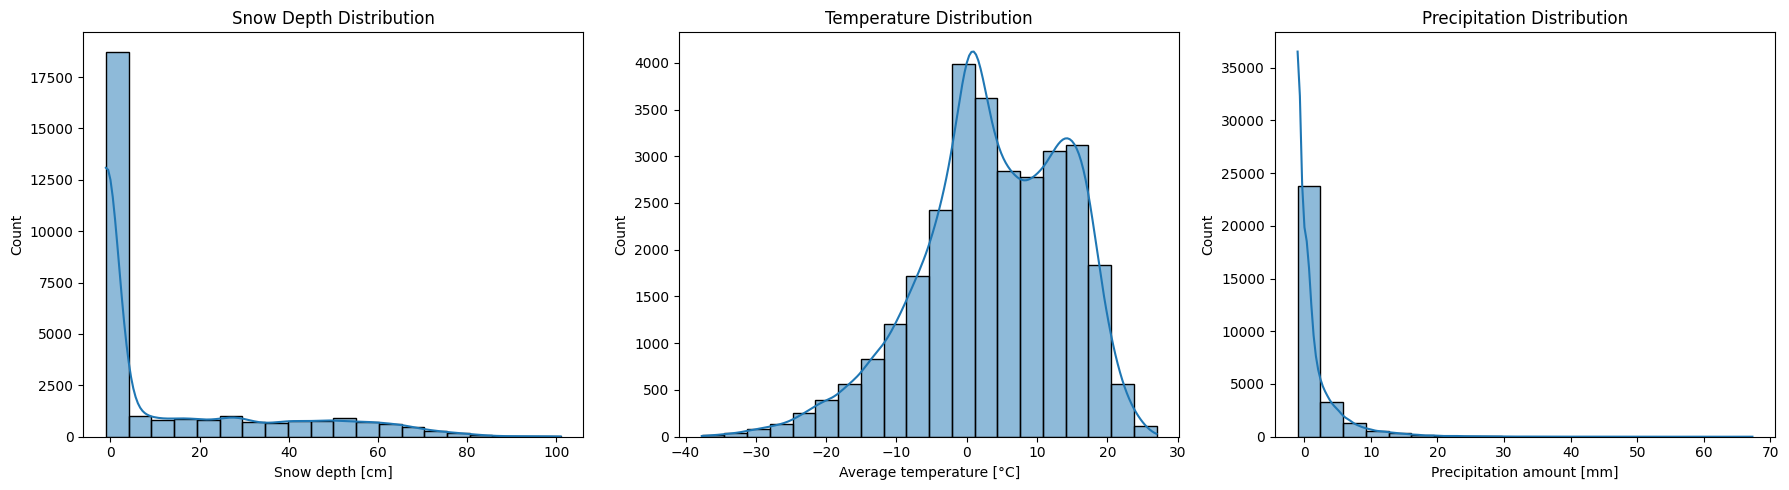

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of snow depth, temperature, and precipitation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Snow Depth
sns.histplot(df_train["Snow depth [cm]"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Snow Depth Distribution")

# Temperature
sns.histplot(df_train["Average temperature [°C]"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Temperature Distribution")

# Precipitation
sns.histplot(df_train["Precipitation amount [mm]"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Precipitation Distribution")

plt.tight_layout()
plt.show()

In [19]:
# Calculate basic statistics for Snow Depth
snow_depth_stats = df_train["Snow depth [cm]"].describe()
print(snow_depth_stats)


count    29452.000000
mean        12.991930
std         22.107289
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         23.000000
max        101.000000
Name: Snow depth [cm], dtype: float64


In [20]:
import pandas as pd
import glob
import os

# Path to folder with CSV files
path = "C:\\Repos\\Project2\\WeatherMachine\\Final_data_scripts\\Data"

# Read all CSV files
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Create an empty list to store dataframes
dfs = []

# Load each file and extract the venue name
for file in csv_files:
    df = pd.read_csv(file)

    # Extract venue name (part before the first underscore)
    filename = os.path.basename(file)  # Get file name without path
    venue_name = filename.split("_")[0]  # Take the part before "_"

    # Add Venue column
    df["Venue"] = venue_name
    dfs.append(df)

# Merge all dataframes into one
df_all = pd.concat(dfs, ignore_index=True)

# Convert Date column to datetime
df_all["Date"] = pd.to_datetime(df_all["Date"])

# Sort by Date (important for trend analysis)
df_all = df_all.sort_values(by=["Venue", "Date"])

# Print a sample of the dataframe to verify
print(df_all.head())

df_all



        Date  Precipitation amount [mm]  Snow depth [cm]  \
0 2005-01-02                        3.1             16.0   
1 2005-01-03                        0.4             19.0   
2 2005-01-04                        1.5             20.0   
3 2005-01-05                        4.3             20.0   
4 2005-01-06                        4.0             34.0   

   Average temperature [°C]  cloud_cover_code  \
0                      -0.3               8.0   
1                      -0.8               7.0   
2                      -2.3               8.0   
3                      -2.9               8.0   
4                      -2.2               8.0   

   Direct solar radiation mean [W/m2]  days_above_10cm  days_above_20cm  Venue  
0                                 1.1                1                0  Himos  
1                                 0.7                2                0  Himos  
2                                 1.8                3                0  Himos  
3                   

,Date,Precipitation amount [mm],Snow depth [cm],Average temperature [°C],cloud_cover_code,Direct solar radiation mean [W/m2],days_above_10cm,days_above_20cm,Venue
0,2005-01-02,3.1,16.0,-0.3,8.0,1.1,1,0,Himos
1,2005-01-03,0.4,19.0,-0.8,7.0,0.7,2,0,Himos
2,2005-01-04,1.5,20.0,-2.3,8.0,1.8,3,0,Himos
3,2005-01-05,4.3,20.0,-2.9,8.0,1.8,4,0,Himos
4,2005-01-06,4.0,34.0,-2.2,8.0,1.7,5,1,Himos
...,...,...,...,...,...,...,...,...,...
73418,2024-12-28,-1.0,19.0,-2.5,1.0,1.5,13,0,Ylläs
73419,2024-12-29,-1.0,19.0,-0.2,7.0,0.5,14,0,Ylläs
73420,2024-12-30,0.9,19.0,-3.1,8.0,42.0,15,0,Ylläs
73421,2024-12-31,0.2,21.0,-4.5,7.0,61.7,16,1,Ylläs


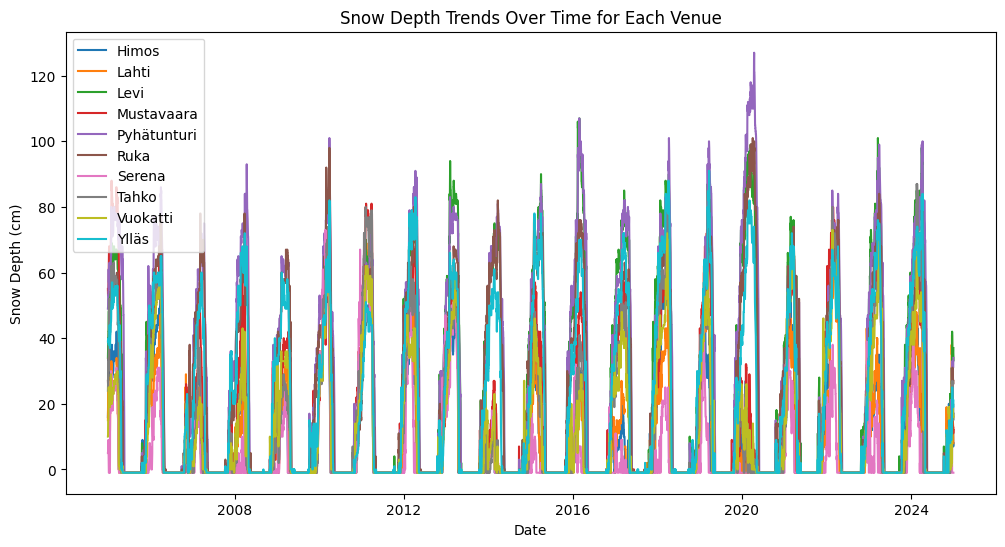

In [21]:
import matplotlib.pyplot as plt

# Plot snow depth over time for each venue
plt.figure(figsize=(12, 6))

for venue in df_all["Venue"].unique():
    df_venue = df_all[df_all["Venue"] == venue]
    plt.plot(df_venue["Date"], df_venue["Snow depth [cm]"], label=venue)

plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Snow Depth Trends Over Time for Each Venue")
plt.legend()
plt.show()



In [22]:
# Count consecutive days with snow > 10 cm
df_all['days_above_10cm'] = (df_all['Snow depth [cm]'] > 10).astype(int)
df_all['days_above_10cm'] = df_all.groupby(["Venue", (df_all['Snow depth [cm]'] <= 10).cumsum()])['days_above_10cm'].cumsum()

# Count consecutive days with snow > 20 cm
df_all['days_above_20cm'] = (df_all['Snow depth [cm]'] > 20).astype(int)
df_all['days_above_20cm'] = df_all.groupby(["Venue", (df_all['Snow depth [cm]'] <= 20).cumsum()])['days_above_20cm'].cumsum()


In [23]:
# Define function to check if a venue meets the criteria
def check_snow_viability(df, venue):
    df_venue = df[df["Venue"] == venue]
    has_10cm_weeks = (df_venue["days_above_10cm"] >= 28).any()  # At least 4 weeks
    has_20cm_weeks = (df_venue["days_above_20cm"] >= 14).any()  # At least 2 weeks
    return {"Venue": venue, "4 weeks > 10cm": has_10cm_weeks, "2 weeks > 20cm": has_20cm_weeks}

# Apply to all venues
viability_results = [check_snow_viability(df_all, v) for v in df_all["Venue"].unique()]
df_viability = pd.DataFrame(viability_results)

print(df_viability)


         Venue  4 weeks > 10cm  2 weeks > 20cm
0        Himos            True            True
1        Lahti            True            True
2         Levi            True            True
3   Mustavaara            True            True
4  Pyhätunturi            True            True
5         Ruka            True            True
6       Serena            True            True
7        Tahko            True            True
8     Vuokatti            True            True
9        Ylläs            True            True


In [24]:
df_train.fillna(method="ffill", inplace=True)

df_test.fillna(method="ffill", inplace=True)

C:\Users\IraErixon\AppData\Local\Temp\ipykernel_9712\1254376231.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train.fillna(method="ffill", inplace=True)
C:\Users\IraErixon\AppData\Local\Temp\ipykernel_9712\1254376231.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test.fillna(method="ffill", inplace=True)


In [25]:
features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
 
# Create a polynomial regression model (degree=2)
poly_degree = 3
model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
 
# Train the model
model.fit(X_train, y_train)
 
# Make predictions
y_pred = model.predict(X_test)

In [ ]:

# Define test features (same as used for training)
X_test = df_test[["Precipitation amount [mm]", "Average temperature [°C]", "Direct solar radiation mean [W/m2]"]]

# Define target variable (actual snow depth)
y_test = df_test["Snow depth [cm]"]

# Apply polynomial transformation to match training model
X_test_poly = poly.transform(X_test)

# Predict snow depth for the test dataset
y_pred = model.predict(X_test_poly)

# Add predictions to the test dataframe for comparison
df_test["Predicted Snow Depth"] = y_pred

# Show a sample of actual vs predicted values
print(df_test[["Date", "Snow depth [cm]", "Predicted Snow Depth"]].head())


AttributeError: 'int' object has no attribute 'transform'